In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns


AttributeError: module 'matplotlib.pyplot' has no attribute 'version'

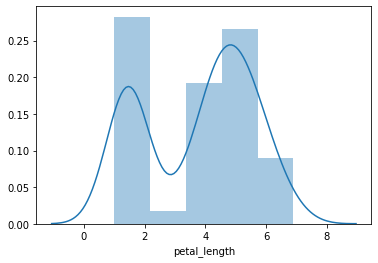

In [16]:
# Use the iris database to answer the following quesitons:
# What does the distribution of petal lengths look like?


iris = sns.load_dataset('iris')

sns.distplot(iris.petal_length)

In [24]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:10: UserWarning: Attempting to set identical bottom == top == 0.5 results in singular transformations; automatically expanding.
  # Remove the CWD from sys.path while we load stuff.


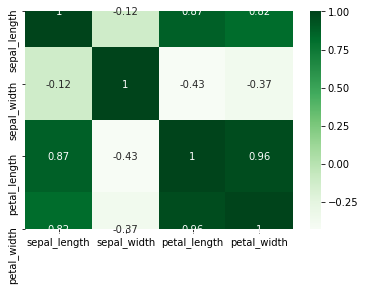

In [91]:
# Is there a correlation between petal length and petal width?

iris_corr = iris[['petal_length','petal_width']]


# fix for mpl bug that cuts off top/bottom of seaborn viz
b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values # ta-da!



sns.heatmap(iris.corr(), annot=True, cmap='Greens')
# # Would it be reasonable to predict species based on sepal width and sepal length?
# Yes
# Which features would be best used to predict species?

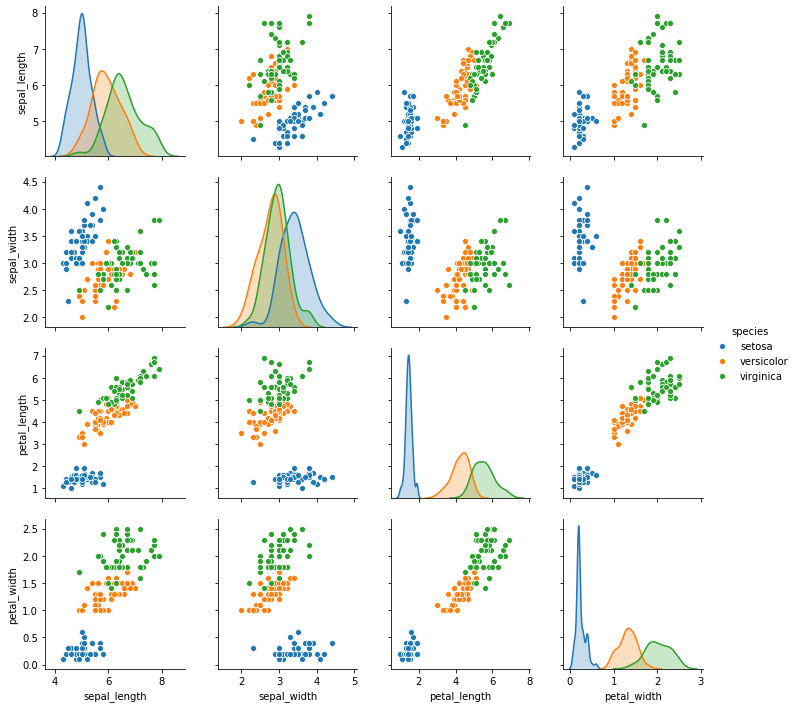

In [45]:
# Which features would be best used to predict species?
sns.pairplot(iris, hue = 'species')
# Petal length and petal width

In [228]:
iris['sepal_area'] = iris.sepal_length * iris.sepal_width
iris['petal_area'] = iris.petal_length * iris.petal_width
feature_engingeering = iris[['species', 'sepal_area', 'petal_length']]

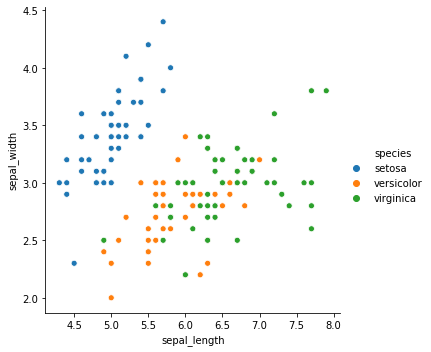

In [38]:
# # Would it be reasonable to predict species based on sepal width and sepal length?
sns.relplot(data=iris, x='sepal_length', y='sepal_width', hue='species')

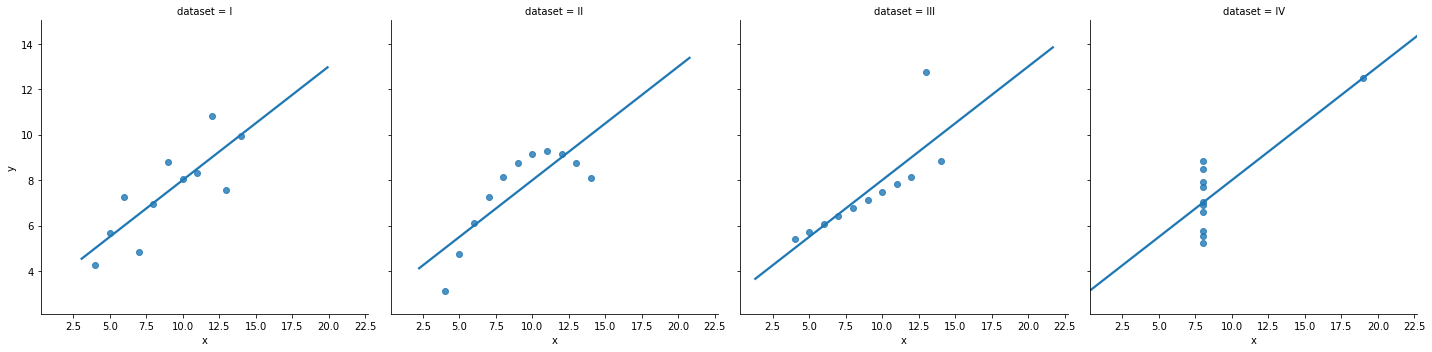

In [8]:
# Using the lesson as an example, use seaborn's load_dataset function 
# to load the anscombe data set. 
# Use pandas to group the data by the dataset column, 
# and calculate summary statistics for each dataset. What do you notice?

# Plot the x and y values from the anscombe data. Each dataset should be in a separate column.

anscombe = sns.load_dataset('anscombe')
anscombe.groupby('dataset').describe()

sns.lmplot(data=anscombe, y='y', x='x', col='dataset', ci = False)

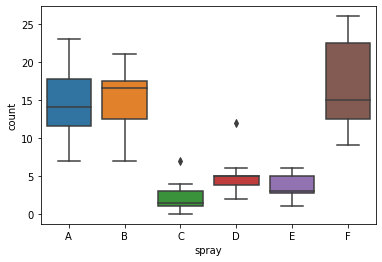

In [60]:
# Load the InsectSprays dataset and read it's documentation. 
# Create a boxplot that shows the effectiveness of the different insect sprays.
import pydataset
insect = pydataset.data('InsectSprays')
sns.boxplot(data = insect, y = 'count', x = 'spray')

In [230]:
insect.groupby('spray').mean()

,count
spray,
A,14.500000
B,15.333333
C,2.083333
D,4.916667
E,3.500000
F,16.666667


In [54]:
insect

,count,spray
1,10,A
2,7,A
3,20,A
4,14,A
5,14,A
6,12,A
7,10,A
8,23,A
9,17,A
10,20,A


In [61]:
pydataset.data('InsectSprays', show_doc = True)

InsectSprays

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Effectiveness of Insect Sprays

### Description

The counts of insects in agricultural experimental units treated with
different insecticides.

### Usage

    InsectSprays

### Format

A data frame with 72 observations on 2 variables.

[,1]

count

numeric

Insect count

[,2]

spray

factor

The type of spray

### Source

Beall, G., (1942) The Transformation of data from entomological field
experiments, _Biometrika_, **29**, 243–262.

### References

McNeil, D. (1977) _Interactive Data Analysis_. New York: Wiley.

### Examples

    require(stats); require(graphics)
    boxplot(count ~ spray, data = InsectSprays,
            xlab = "Type of spray", ylab = "Insect count",
            main = "InsectSprays data", varwidth = TRUE, col = "lightgray")
    fm1 <- aov(count ~ spray, data = InsectSprays)
    summary(fm1)
    opar <- par(mfrow = c(2, 2), oma = c(0, 0, 1.1, 0))
    plot(fm1)
 

In [70]:
# Load the swiss dataset and read it's documentation. 
# Create visualizations to answer the following questions:

# Create an attribute named is_catholic that holds a boolean value 
# of whether or not the province is Catholic. (Choose a cutoff point for what constitutes catholic)
swiss = pydataset.data('swiss')
swiss['is_catholic'] = swiss.Catholic > 80
swiss

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality,is_catholic
Courtelary,80.2,17.0,15,12,9.96,22.2,False
Delemont,83.1,45.1,6,9,84.84,22.2,True
Franches-Mnt,92.5,39.7,5,5,93.40,20.2,True
Moutier,85.8,36.5,12,7,33.77,20.3,False
Neuveville,76.9,43.5,17,15,5.16,20.6,False
Porrentruy,76.1,35.3,9,7,90.57,26.6,True
Broye,83.8,70.2,16,7,92.85,23.6,True
Glane,92.4,67.8,14,8,97.16,24.9,True
Gruyere,82.4,53.3,12,7,97.67,21.0,True
Sarine,82.9,45.2,16,13,91.38,24.4,True


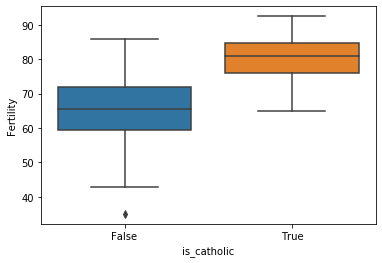

In [82]:
# Does whether or not a province is Catholic influence fertility?
sns.boxplot(data = swiss, y = 'Fertility', x =  'is_catholic')


In [84]:
swiss.groupby('is_catholic').Fertility.describe()

,count,mean,std,min,25%,50%,75%,max
is_catholic,,,,,,,,
False,31.0,64.770968,10.854283,35.0,59.40,65.5,71.850,85.8
True,16.0,80.550000,8.229945,65.0,75.95,80.9,84.625,92.5


In [83]:
pydataset.data('swiss', show_doc = True)

swiss

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Swiss Fertility and Socioeconomic Indicators (1888) Data

### Description

Standardized fertility measure and socio-economic indicators for each of 47
French-speaking provinces of Switzerland at about 1888.

### Usage

    data(swiss)

### Format

A data frame with 47 observations on 6 variables, each of which is in percent,
i.e., in [0,100].

[,1] Fertility Ig, "common standardized fertility measure" [,2] Agriculture
[,3] Examination nation [,4] Education [,5] Catholic [,6] Infant.Mortality
live births who live less than 1 year.

All variables but 'Fert' give proportions of the population.

### Source

Project "16P5", pages 549-551 in

Mosteller, F. and Tukey, J. W. (1977) “Data Analysis and Regression: A Second
Course in Statistics”. Addison-Wesley, Reading Mass.

indicating their source as "Data used by permission of Franice van de Walle.
Office of Population Research, Princeton Univer

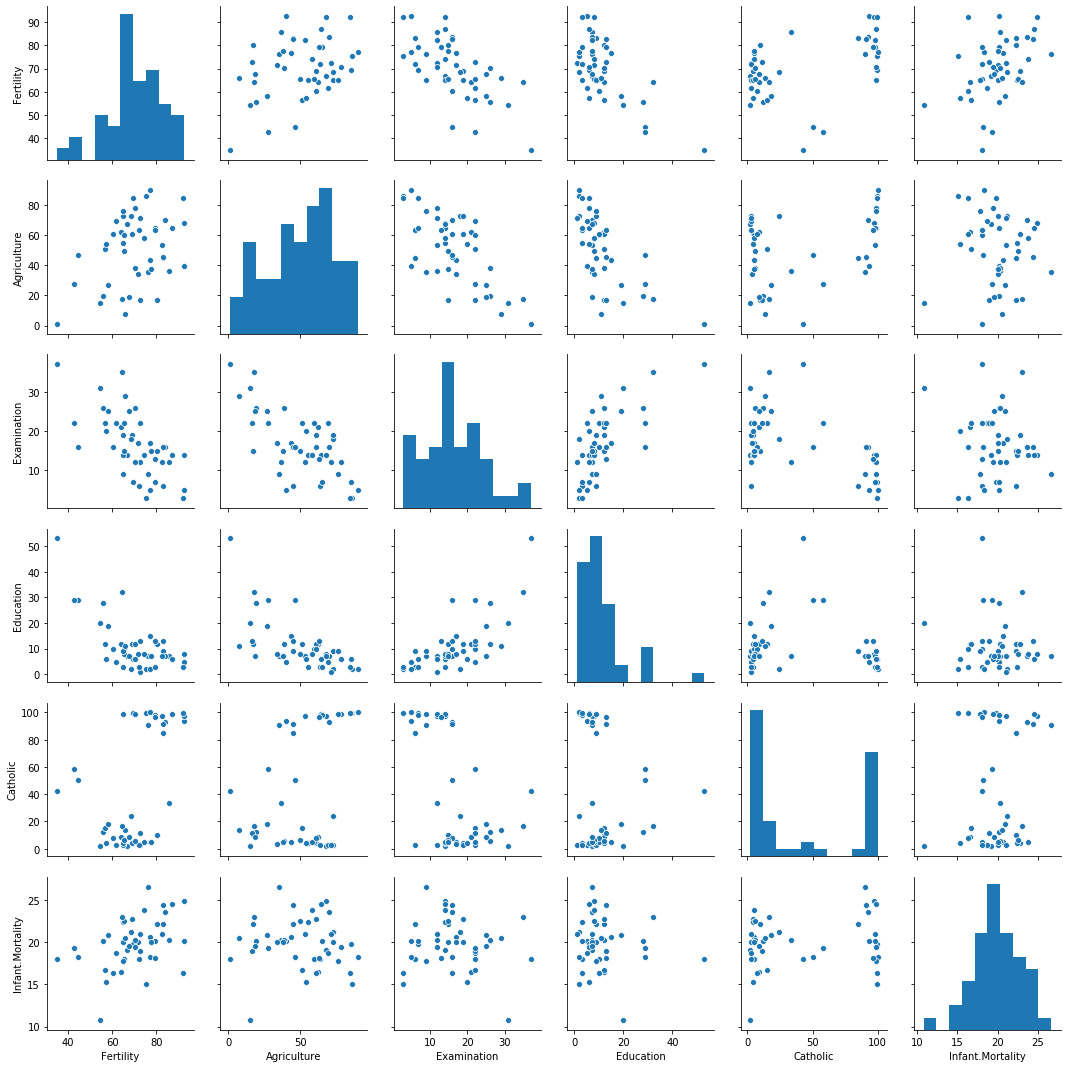

In [89]:
swiss = pydataset.data('swiss')
sns.pairplot(swiss)

/usr/local/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Attempting to set identical bottom == top == 0.5 results in singular transformations; automatically expanding.
  after removing the cwd from sys.path.


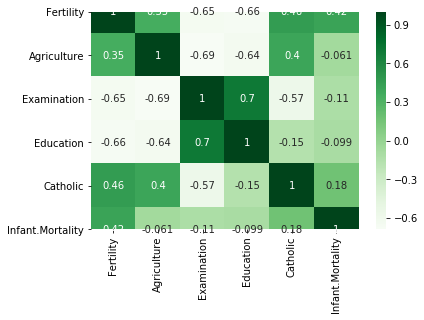

In [92]:
# What measure correlates most strongly with fertility?
# Catholicism
#Lack of education

b, t = plt.ylim() # discover the values for bottom and top
b += 0.5 # Add 0.5 to the bottom
t -= 0.5 # Subtract 0.5 from the top
plt.ylim(b, t) # update the ylim(bottom, top) values # ta-da!



sns.heatmap(swiss.corr(), annot=True, cmap='Greens')

In [93]:
swiss.corr()

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000000,0.353079,-0.645883,-0.663789,0.463685,0.416556
Agriculture,0.353079,1.000000,-0.686542,-0.639523,0.401095,-0.060859
Examination,-0.645883,-0.686542,1.000000,0.698415,-0.572742,-0.114022
Education,-0.663789,-0.639523,0.698415,1.000000,-0.153859,-0.099322
Catholic,0.463685,0.401095,-0.572742,-0.153859,1.000000,0.175496
Infant.Mortality,0.416556,-0.060859,-0.114022,-0.099322,0.175496,1.000000


In [105]:
# Using the chipotle dataset from the previous exercise, 
# create a bar chart that shows the 4 most popular items and the revenue produced by each.

from env import host, user, password

url = f'mysql+pymysql://{user}:{password}@{host}/chipotle'

orders = pd.read_sql('SELECT * FROM orders', url)

orders['item_price'] = orders.item_price.str.replace("$","").astype(float)
orders

,id,order_id,quantity,item_name,choice_description,item_price
0,1,1,1,Chips and Fresh Tomato Salsa,nan,$2.39
1,2,1,1,Izze,[Clementine],$3.39
2,3,1,1,Nantucket Nectar,[Apple],$3.39
3,4,1,1,Chips and Tomatillo-Green Chili Salsa,nan,$2.39
4,5,2,2,Chicken Bowl,"[Tomatillo-Red Chili Salsa (Hot), [Black Beans, Rice, Cheese, Sour Cream]]",$16.98
...,...,...,...,...,...,...
4617,4618,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Black Beans, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4618,4619,1833,1,Steak Burrito,"[Fresh Tomato Salsa, [Rice, Sour Cream, Cheese, Lettuce, Guacamole]]",$11.75
4619,4620,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Pinto Beans, Guacamole, Lettuce]]",$11.25
4620,4621,1834,1,Chicken Salad Bowl,"[Fresh Tomato Salsa, [Fajita Vegetables, Lettuce]]",$8.75


In [220]:
# create a bar chart that shows the 4 most popular items and the revenue produced by each.
answer = orders.groupby('item_name').item_price.sum().nlargest(4)
# answer['item_name'] = answer.index

answer = pd.DataFrame(answer)
answer['item_name'] = answer.index

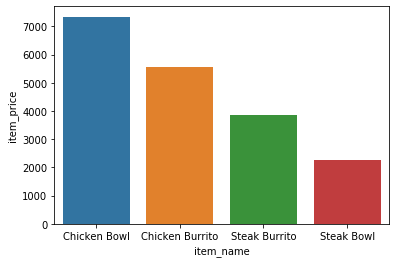

In [221]:
sns.barplot(data = answer, x = 'item_name', y = 'item_price')

In [162]:
# Load the sleepstudy data and read it's documentation.

sleep_study = pydataset.data('sleepstudy')
pydataset.data('sleepstudy', show_doc = True)

sleepstudy

PyDataset Documentation (adopted from R Documentation. The displayed examples are in R)

## Reaction times in a sleep deprivation study

### Description

The average reaction time per day for subjects in a sleep deprivation study.
On day 0 the subjects had their normal amount of sleep. Starting that night
they were restricted to 3 hours of sleep per night. The observations represent
the average reaction time on a series of tests given each day to each subject.

### Format

A data frame with 180 observations on the following 3 variables.

`Reaction`

Average reaction time (ms)

`Days`

Number of days of sleep deprivation

`Subject`

Subject number on which the observation was made.

### Details

These data are from the study described in Belenky et al. (2003), for the
sleep-deprived group and for the first 10 days of the study, up to the
recovery period.

### References

Gregory Belenky, Nancy J. Wesensten, David R. Thorne, Maria L. Thomas, Helen
C. Sing, Daniel P. Redmond, 

In [213]:
average_reaction_time = sleep_study.groupby("Days").Reaction.mean()
average_reaction_time = pd.DataFrame(average_reaction_time)
average_reaction_time['Days'] = average_reaction_time.index

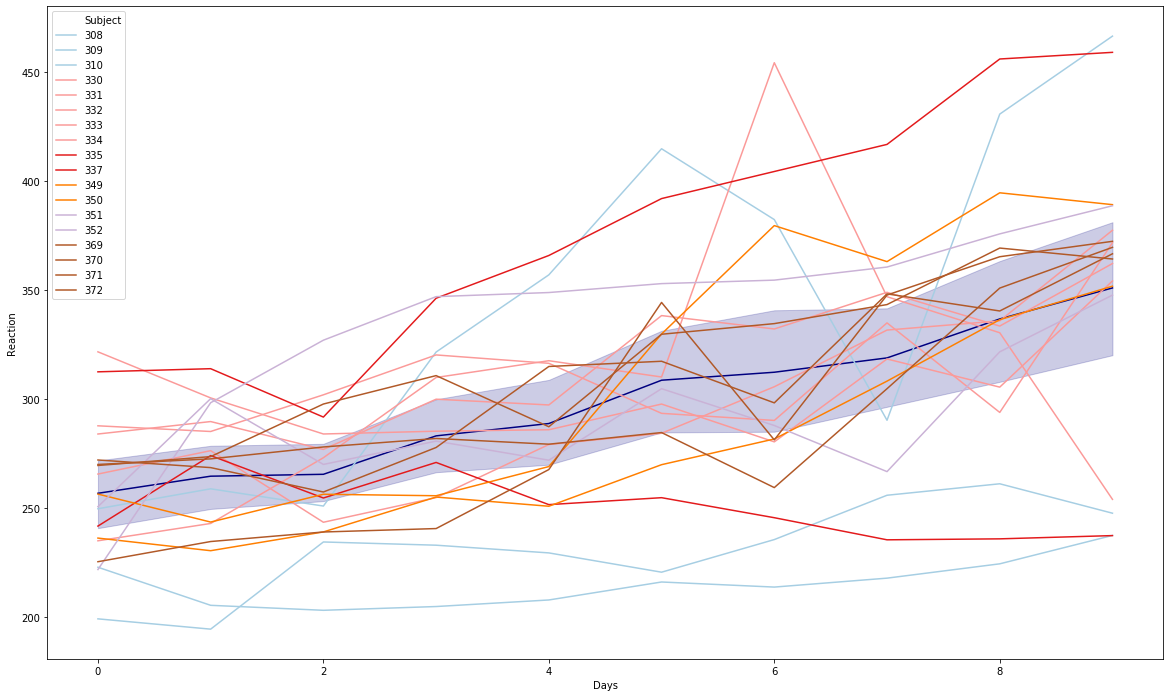

In [239]:
# Use seaborn to create a line chart of all the individual
# subject's reaction times and a more prominant line showing 
# the average change in reaction time.
plt.figure(figsize=(20,12))

# sns.lmplot(data = average_reaction_time, x = 'Days', y ='Reaction')
sns.lineplot(data=sleep_study, y='Reaction', x='Days', color='navy', ci = 95)
sns.lineplot(data = sleep_study, x = 'Days', y ='Reaction', hue = 'Subject', legend = 'full', estimator = 'mean', palette = 'Paired', ci = 50)


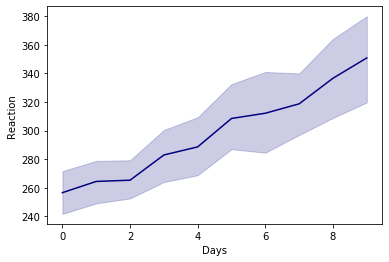

In [234]:
sns.lineplot(data=sleep_study, y='Reaction', x='Days', color='navy')

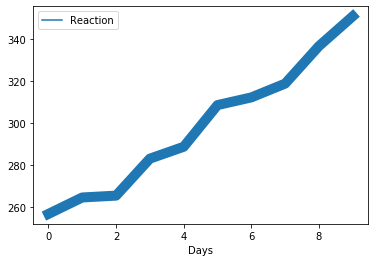

In [207]:
sns.lineplot(data = average_reaction_time, ci = 90, linewidth=10)

In [231]:
chipot_bar = sns.barplot(data=top_4, x='item_name', y='item_price')
for index, row in top_4.iterrows():
    chipot_bar.text(row.name, row.item_price, 
                      round(row.item_price,2), color='black', 
                      ha="center")
    
    

NameError: name 'top_4' is not defined

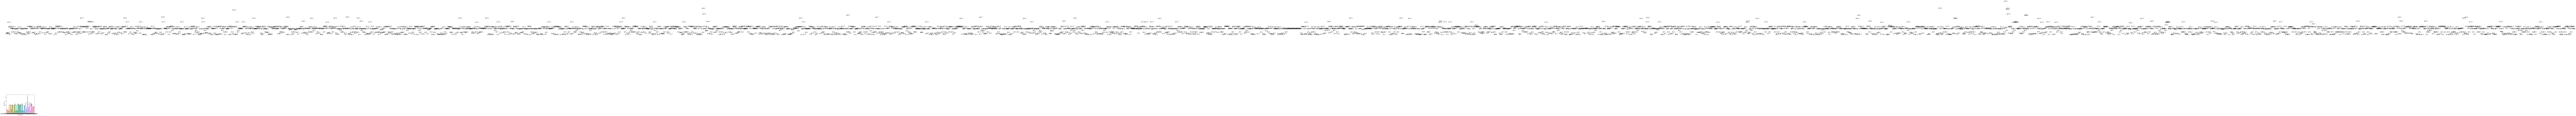

In [232]:
sns.barplot(data = orders, x = 'item_name', y = 'item_price')
# add text to the top of each box
for i,num in enumerate(orders.item_price):
    plt.text(
        i,
        num + 100,
        f'${num:.1f}',
        ha='center',
        va='center',
        color='black',
        fontsize=15
    )